In [225]:
# deepsalsa.py a bunch of funcitons to analyze the data of the deel salsa experiment
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import collections

In [226]:
def get_all_songnames(dir):
#get the songs on the directory
#make a dictionary with song names as keys and annotators as subjects
    name_list=listdir(dir)
    song_annotator_dictionary={}
    for name in name_list:
        if name.split("_")[0] not in song_annotator_dictionary: #check if key is already in dict
            song_annotator_dictionary[name.split("_")[0]]=[name.split("_")[1].split(".")[0]]
        else:
            song_annotator_dictionary[name.split("_")[0]].append(name.split("_")[1].split(".")[0])

    #print song_annotator_dictionary # this dict contains songnames and annotator ids
    return song_annotator_dictionary


In [227]:
def extract_annotations_from_song(song_name, name_list):
    song_annotations=[]
    
    for annotator in name_list[song_name]:
        
        annotation_file=song_name+"_"+annotator+".txt"
        annotation=[]
        annotation.append(int(annotator))
        print(annotation_file)
        with open("data/"+annotation_file) as timeline:
            for line in timeline:
                line=line.split(" ")
            for time in line:
                #print(len(time))
                #print float(time)
                timefloat=float(time)
                annotation.append(float(timefloat))
        song_annotations.append(annotation)
    triad_list=[]
    minimum_list=min(len(song_annotations[0]),len(song_annotations[1]), len(song_annotations[2]))
    for data1 in range(minimum_list):
        for data2 in range(minimum_list):
            for data3 in range(minimum_list):

                #find if all three annotations are closer by less than 500ms
                if abs(song_annotations[0][data1]-song_annotations[1][data2])<0.5 and abs(song_annotations[0][data1]-song_annotations[2][data3])<0.5: 
                    dispersion=max([song_annotations[0][data1],song_annotations[1][data2], song_annotations[2][data3]])-min([song_annotations[0][data1],song_annotations[1][data2], song_annotations[2][data3]])
                    if dispersion<0.2:
                        triad_list.append([song_annotations[0][data1],song_annotations[1][data2], song_annotations[2][data3]])
    
    for triad in triad_list:
        dispersion=max(triad)-min(triad)
        print(triad, "dispersion:", dispersion)
    
    
        
    print("length of first list: ", len(song_annotations[0]))
    print("length of second list: ", len(song_annotations[1]))
    print("length of third list: ", len(song_annotations[2]))
    print("average of length list: ", (len(song_annotations[0])+len(song_annotations[1])+len(song_annotations[2]))/3)
    print("length of triad list: ", len(triad_list))
    print("-------------------------------------------------")
    
    return triad_list

In [228]:
name_list=get_all_songnames("data") #process all annotated songs in data folder
flag = True
all_triad_list = {}
for song in name_list:
    if song == "20":
        flag = False
    if flag:
        all_triad_list[song] = extract_annotations_from_song(song, name_list)#extract annotations from song 1

10_1107514113.txt
10_1112970200.txt
10_1233194515.txt
[3.4644711017608643, 3.4717838764190674, 3.4576215744018555] dispersion: 0.014162302017211914
[4.552404165267944, 4.608361482620239, 4.586089134216309] dispersion: 0.05595731735229492
[5.727695465087891, 5.688257694244385, 5.785265922546387] dispersion: 0.09700822830200195
[6.895616769790649, 6.895843982696533, 6.889191389083862] dispersion: 0.0066525936126708984
[7.495717763900757, 7.503501653671265, 7.497596740722656] dispersion: 0.0077838897705078125
[8.655913352966309, 8.688112735748291, 8.697692632675171] dispersion: 0.041779279708862305
[9.864097833633423, 9.855919122695923, 9.865140914916992] dispersion: 0.009221792221069336
[10.991715669631958, 10.9922194480896, 11.001861572265625] dispersion: 0.010145902633666992
[12.127975463867188, 12.128204107284546, 12.161016464233398] dispersion: 0.03304100036621094
[13.272248029708862, 13.280159711837769, 13.337429761886597] dispersion: 0.06518173217773438
[14.440302610397339, 14.4082

[168.6501362323761, 168.48859763145447, 168.60608959197998] dispersion: 0.16153860092163086
[169.5946865081787, 169.4408884048462, 169.50205302238464] dispersion: 0.15379810333251953
[170.49081587791443, 170.3693346977234, 170.43036031723022] dispersion: 0.12148118019104004
[171.43430876731873, 171.28150153160095, 171.35829758644104] dispersion: 0.15280723571777344
[172.36258625984192, 172.19342279434204, 172.2865731716156] dispersion: 0.16916346549987793
[173.28279972076416, 173.1534538269043, 173.20661115646362] dispersion: 0.12934589385986328
[174.2303020954132, 174.03756594657898, 174.14804792404175] dispersion: 0.19273614883422852
[175.15081787109375, 175.02056193351746, 175.09756326675415] dispersion: 0.13025593757629395
[176.1122531890869, 176.05148315429688, 176.01003789901733] dispersion: 0.10221529006958008
[177.04637169837952, 176.86845541000366, 176.97748517990112] dispersion: 0.1779162883758545
[178.01412892341614, 177.89556169509888, 177.90594696998596] dispersion: 0.1185

[2.208082675933838, 2.264650344848633, 2.103785991668701] dispersion: 0.16086435317993164
[2.912391424179077, 2.8802690505981445, 2.815561056137085] dispersion: 0.09683036804199219
[3.600085735321045, 3.648275375366211, 3.5285050868988037] dispersion: 0.11977028846740723
[4.256027936935425, 4.303642272949219, 4.192148923873901] dispersion: 0.11149334907531738
[4.975766181945801, 4.976114511489868, 4.928457736968994] dispersion: 0.04765677452087402
[5.647879123687744, 5.687817811965942, 5.591758728027344] dispersion: 0.09605908393859863
[7.0397655963897705, 7.0081329345703125, 6.96024751663208] dispersion: 0.07951807975769043
[7.583649635314941, 7.719937324523926, 7.67983341217041] dispersion: 0.13628768920898438
[8.960130214691162, 9.07975721359253, 9.048546075820923] dispersion: 0.11962699890136719
[9.79148817062378, 9.72778582572937, 9.728270769119263] dispersion: 0.06370234489440918
[10.479938745498657, 10.535874843597412, 10.424457311630249] dispersion: 0.11141753196716309
[11.1354

[14.800676345825195, 14.751769065856934, 14.799405574798584] dispersion: 0.04890727996826172
[15.784630060195923, 15.775445222854614, 15.767685651779175] dispersion: 0.016944408416748047
[16.74476456642151, 16.783136129379272, 16.74341058731079] dispersion: 0.039725542068481445
[17.768885850906372, 17.75935411453247, 17.72752332687378] dispersion: 0.04136252403259277
[18.688601970672607, 18.743202924728394, 18.72813057899475] dispersion: 0.05460095405578613
[19.681485891342163, 19.671751737594604, 19.663922786712646] dispersion: 0.0175631046295166
[20.664272785186768, 20.63185214996338, 20.62399458885193] dispersion: 0.04027819633483887
[21.60045838356018, 21.62360978126526, 21.616057872772217] dispersion: 0.023151397705078125
[22.544455766677856, 22.55928635597229, 22.536266803741455] dispersion: 0.02301955223083496
[23.488675832748413, 23.504050493240356, 23.472228527069092] dispersion: 0.03182196617126465
[24.488070487976074, 24.471762895584106, 24.48002314567566] dispersion: 0.0163

[10.70375394821167, 10.78411316871643, 10.800262212753296] dispersion: 0.09650826454162598
[38.19219660758972, 38.23203802108765, 38.328412771224976] dispersion: 0.1362161636352539
[55.86402416229248, 55.84815859794617, 55.90467882156372] dispersion: 0.05652022361755371
[60.455228328704834, 60.43246340751648, 60.51268172264099] dispersion: 0.08021831512451172
[229.6721067428589, 229.6399154663086, 229.47399497032166] dispersion: 0.19811177253723145
length of first list:  490
length of second list:  488
length of third list:  484
average of length list:  487.3333333333333
length of triad list:  5
-------------------------------------------------
16_1018506016.txt
16_1144095442.txt
16_1233194515.txt
length of first list:  244
length of second list:  237
length of third list:  265
average of length list:  248.66666666666666
length of triad list:  0
-------------------------------------------------
17_1018506016.txt
17_1143875321.txt
17_1144095442.txt
[60.295706033706665, 60.15808010101318

[1.5763604640960693, 1.653465747833252, 1.5685923099517822] dispersion: 0.08487343788146973
[2.552309513092041, 2.5334887504577637, 2.5200467109680176] dispersion: 0.03226280212402344
[3.4080846309661865, 3.4129388332366943, 3.400805950164795] dispersion: 0.012132883071899414
[4.247740030288696, 4.24555230140686, 4.288131475448608] dispersion: 0.04257917404174805
[5.167694330215454, 5.1175782680511475, 5.168359041213989] dispersion: 0.0507807731628418
[6.063931465148926, 5.973350286483765, 6.0321433544158936] dispersion: 0.09058117866516113
[6.888160467147827, 6.908994674682617, 6.89696741104126] dispersion: 0.02083420753479004
[7.743796348571777, 7.7658302783966064, 7.7769105434417725] dispersion: 0.03311419486999512
[8.672108173370361, 8.653649806976318, 8.656220436096191] dispersion: 0.01845836639404297
[9.520298719406128, 9.524896144866943, 9.512787580490112] dispersion: 0.012108564376831055
[10.448405981063843, 10.381819009780884, 10.408879280090332] dispersion: 0.0665869712829589

[29.8876793384552, 29.944302558898926, 29.84046196937561] dispersion: 0.10384058952331543
[30.919507026672363, 31.009088277816772, 30.896731853485107] dispersion: 0.11235642433166504
length of first list:  254
length of second list:  255
length of third list:  507
average of length list:  338.6666666666667
length of triad list:  2
-------------------------------------------------


In [229]:
def average_triad_list(triad_list):
    processed_list = {}
    for x in range(0,len(triad_list)):
        processed_list[x] = sum(triad_list[x])/len(triad_list[x])
    
    print(processed_list)
    return processed_list

In [230]:
dict_10 = [ v for v in average_triad_list(all_triad_list['10']).values() ]

{0: 3.464625517527262, 1: 4.582284927368164, 2: 5.733739693959554, 3: 6.893550713857015, 4: 7.4989387194315595, 5: 8.680572907129923, 6: 9.861719290415445, 7: 10.995265563329061, 8: 12.139065345128378, 9: 13.29661250114441, 10: 14.432792981465658, 11: 15.5680251121521, 12: 16.72272562980652, 13: 17.904188950856526, 14: 19.06985894838969, 15: 20.227244297663372, 16: 21.38707995414734, 17: 22.60005831718445, 18: 23.77889545758565, 19: 24.9309504032135, 20: 26.141735712687176, 21: 27.304202159245808, 22: 28.458656390508015, 23: 29.62967324256897, 24: 30.776296615600586, 25: 31.94161367416382, 26: 34.25085520744324, 27: 35.4403768380483, 28: 36.072424014409386, 29: 36.669582525889076, 30: 37.8803616364797, 31: 39.120346546173096, 32: 40.27492300669352, 33: 41.384066343307495, 34: 42.517627000808716, 35: 43.67737738291422, 36: 44.82966669400533, 37: 45.97347148259481, 38: 47.17345857620239, 39: 48.31212782859802, 40: 49.41323677698771, 41: 50.57876443862915, 42: 51.64020220438639, 43: 52.85

In [231]:
dict_10

[3.464625517527262,
 4.582284927368164,
 5.733739693959554,
 6.893550713857015,
 7.4989387194315595,
 8.680572907129923,
 9.861719290415445,
 10.995265563329061,
 12.139065345128378,
 13.29661250114441,
 14.432792981465658,
 15.5680251121521,
 16.72272562980652,
 17.904188950856526,
 19.06985894838969,
 20.227244297663372,
 21.38707995414734,
 22.60005831718445,
 23.77889545758565,
 24.9309504032135,
 26.141735712687176,
 27.304202159245808,
 28.458656390508015,
 29.62967324256897,
 30.776296615600586,
 31.94161367416382,
 34.25085520744324,
 35.4403768380483,
 36.072424014409386,
 36.669582525889076,
 37.8803616364797,
 39.120346546173096,
 40.27492300669352,
 41.384066343307495,
 42.517627000808716,
 43.67737738291422,
 44.82966669400533,
 45.97347148259481,
 47.17345857620239,
 48.31212782859802,
 49.41323677698771,
 50.57876443862915,
 51.64020220438639,
 52.85616413752238,
 53.97071393330892,
 55.11767649650574,
 56.29603226979574,
 57.41838280359904,
 58.581267674764,
 59.7171349

## Delay.txt

Load the delay.txt to analize the data

In [232]:
file = open("delay.txt","r")

In [233]:
delay = {}
line = file.readline()
while line != "":
    data = line.split("_")
    delay[data[1]] = {}
    line = file.readline()
file.close()

file = open("delay.txt","r")
line = file.readline()
while line != "":
    data = line.split("_")
    aux_dict = delay[data[1]]
    aux_dict[data[0]] = data[2]
    delay[data[1]] = aux_dict 
    line = file.readline()
    
    

In [234]:
# method to claculate the repetitions of a value in one day.

def calculate_repetitions_delay_day(delay_dict):
        repetitions = {}
        if delay_dict[0]!='\n':
            for item in delay_dict:
                if float(item) in repetitions:      
                    item = item.split("\n")[0]
                    repetitions[float(item)] = repetitions[float(item)]+1
                else:
                    item = item.split("\n")[0]
                    repetitions[float(item)] = 1
        print(repetitions)            
        return(repetitions)

In [235]:
delay

{'1233194515': {'2019/5/22': '-0.11 0.07\n'},
 '1144095442': {'2019/5/22': '0.09 -0.07 0.07 -0.09 0.11 -0.03 0.11 -0.2 -0.08 0.09 -0.07 0.11 -0.08 0.08 -0.09 0.11 -0.08 0.05 -0.07 0.11 -0.11 0.08 -0.07 0.1 -0.11 0.08 -0.09 0.11\n',
  '2019/6/5': '-0.1 0.04 0.04 -0.12 0.06 -0.15 0.02 -0.12 0.03 -0.14 0.04 -0.15 0.03 -0.16 -0.0 0.2 -0.15 0.05 -0.13 -0.01 -0.06 0.03 -0.17 0.04 -0.12 0.04\n',
  '2019/6/6': '0.03 0.17 -0.02 0.16 -0.05 0.14 -0.2 -0.03 0.12 -0.04 0.11 -0.03 0.08 -0.1 0.14 -0.03 0.17 0.12 -0.03 -0.07 0.13 0.15\n'},
 '1061814443': {'2019/5/22': '\n'},
 '1018506016': {'2019/5/22': '-0.07 0.09 -0.1 0.04 -0.1 0.08 -0.09 0.07 -0.11 0.11 -0.1 0.05 -0.11 0.06 0.18 -0.1 0.05 -0.1 0.07 -0.11 0.06\n',
  '2019/5/28': '-0.09 0.08 -0.13 0.04 -0.1 0.04 -0.16 0.03 -0.12 -0.0 -0.12 0.02 -0.11 0.07 -0.13 0.03 -0.11 0.12 -0.2 0.01 -0.12 0.05\n',
  '2019/6/5': '-0.01 0.19 -0.17 -0.02 0.19 -0.14 -0.02 0.18 -0.16 0.01 0.13 -0.0 -0.17 0.01 0.18 -0.19 -0.01 0.19 -0.16 0.03 0.18 -0.18 -0.03 -0.16 0.0

In [236]:
hist_data = calculate_repetitions_delay_day(delay['1112970200']['2019/6/5'].split(" "))
hist_data = collections.OrderedDict(sorted(hist_data.items()))

{-0.05: 2, 0.09: 1, -0.08: 1, 0.07: 1, 0.15: 2, -0.16: 1, -0.07: 1, 0.04: 1, -0.03: 2, 0.1: 1, -0.04: 1, 0.13: 2, 0.01: 1, 0.14: 2, -0.02: 2, -0.06: 1, 0.17: 1, 0.11: 1, 0.19: 1, 0.16: 1}


1233194515
2019/5/22
{-0.11: 1, 0.07: 1}
1144095442
2019/5/22
{0.09: 2, -0.07: 4, 0.07: 1, -0.09: 3, 0.11: 6, -0.03: 1, -0.2: 1, -0.08: 3, 0.08: 3, 0.05: 1, -0.11: 2, 0.1: 1}
1144095442
2019/6/5
{-0.1: 1, 0.04: 5, -0.12: 3, 0.06: 1, -0.15: 3, 0.02: 1, 0.03: 3, -0.14: 1, -0.16: 1, -0.0: 1, 0.2: 1, 0.05: 1, -0.13: 1, -0.01: 1, -0.06: 1, -0.17: 1}
1144095442
2019/6/6
{0.03: 1, 0.17: 2, -0.02: 1, 0.16: 1, -0.05: 1, 0.14: 2, -0.2: 1, -0.03: 4, 0.12: 2, -0.04: 1, 0.11: 1, 0.08: 1, -0.1: 1, -0.07: 1, 0.13: 1, 0.15: 1}
1061814443
2019/5/22
{}
1018506016
2019/5/22
{-0.07: 1, 0.09: 1, -0.1: 5, 0.04: 1, 0.08: 1, -0.09: 1, 0.07: 2, -0.11: 3, 0.11: 1, 0.05: 2, 0.06: 2, 0.18: 1}
1018506016
2019/5/28
{-0.09: 1, 0.08: 1, -0.13: 2, 0.04: 2, -0.1: 1, -0.16: 1, 0.03: 2, -0.12: 3, -0.0: 1, 0.02: 1, -0.11: 2, 0.07: 1, 0.12: 1, -0.2: 1, 0.01: 1, 0.05: 1}
1018506016
2019/6/5
{-0.01: 2, 0.19: 3, -0.17: 3, -0.02: 3, -0.14: 1, 0.18: 3, -0.16: 3, 0.01: 4, 0.13: 2, -0.0: 1, -0.19: 1, 0.03: 1, -0.18: 1, -0.03: 1, 

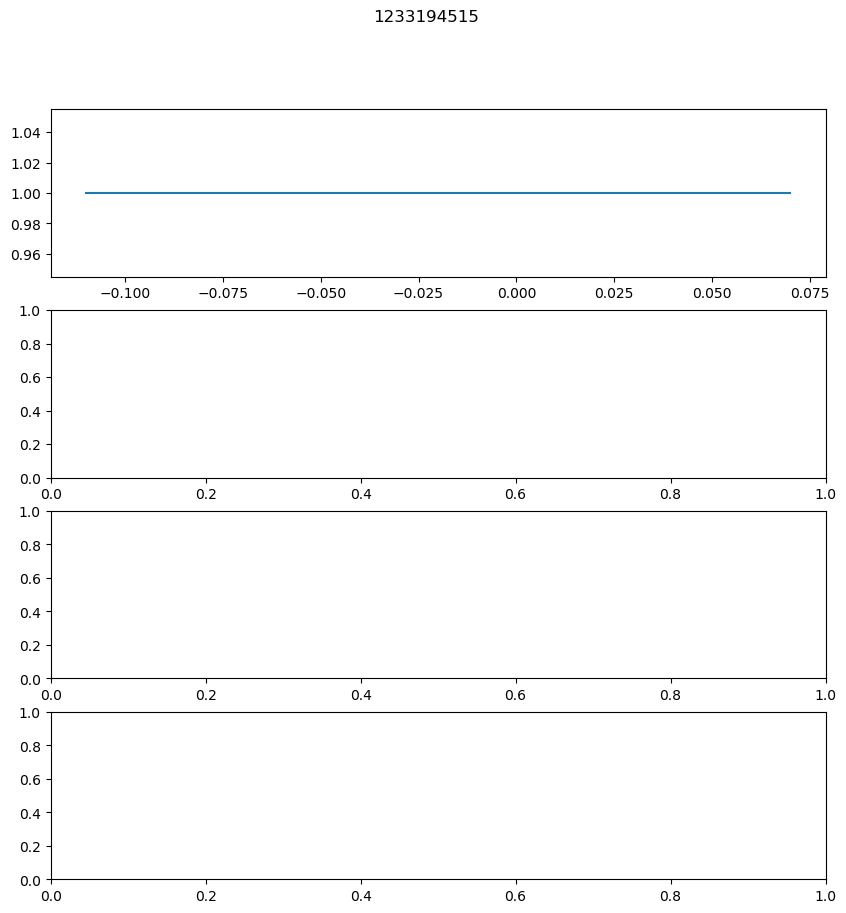

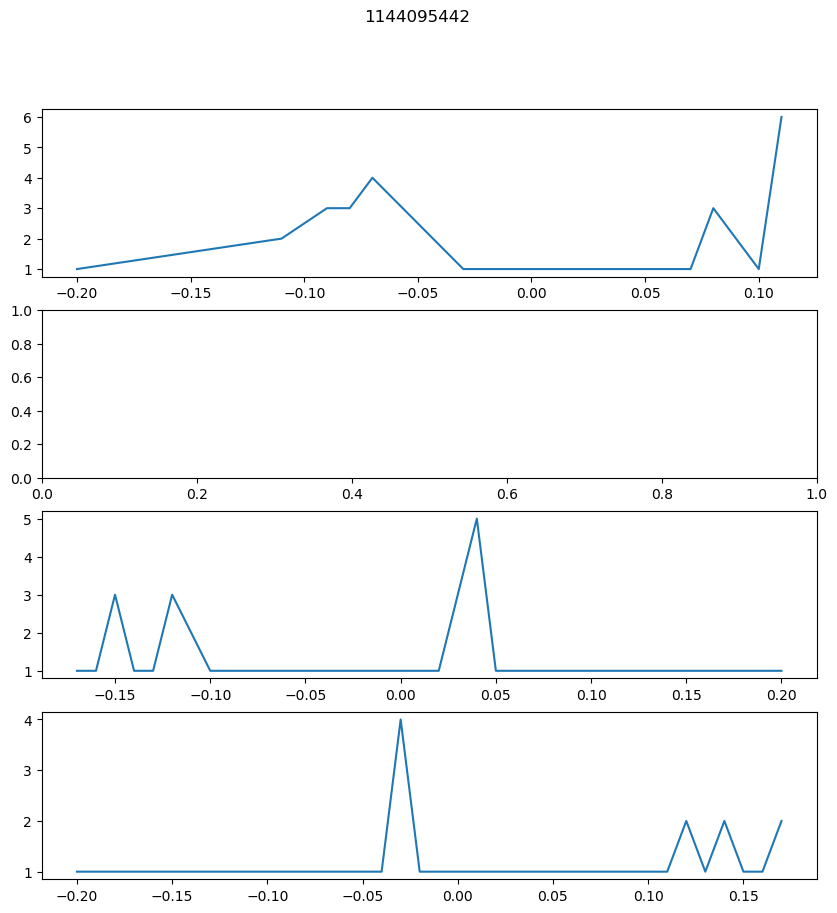

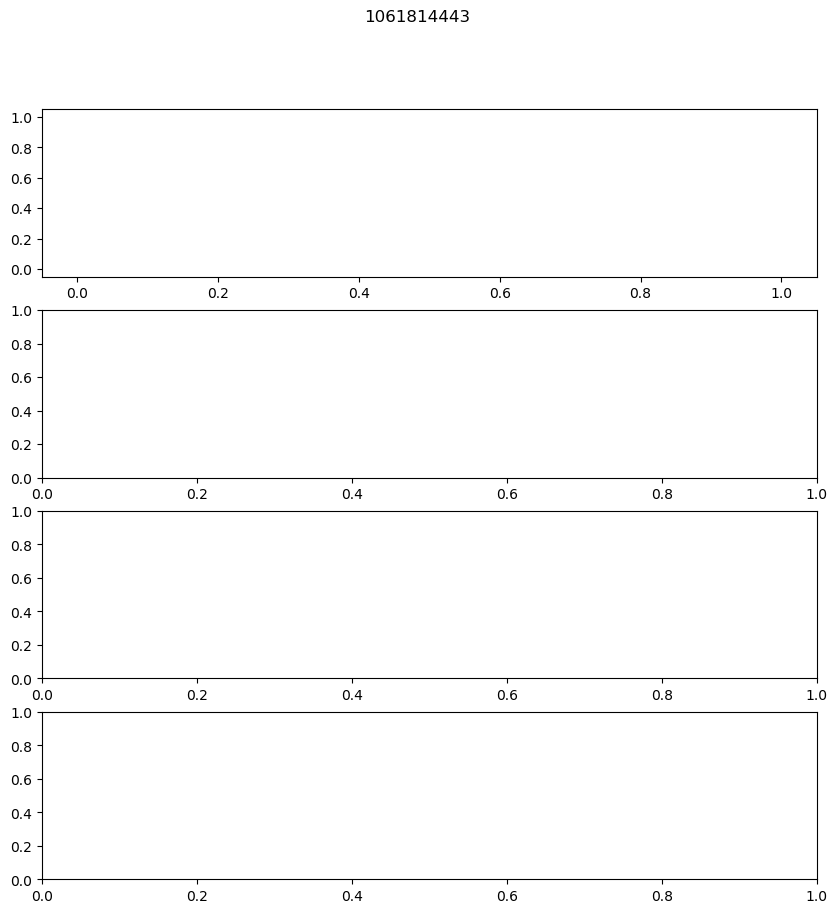

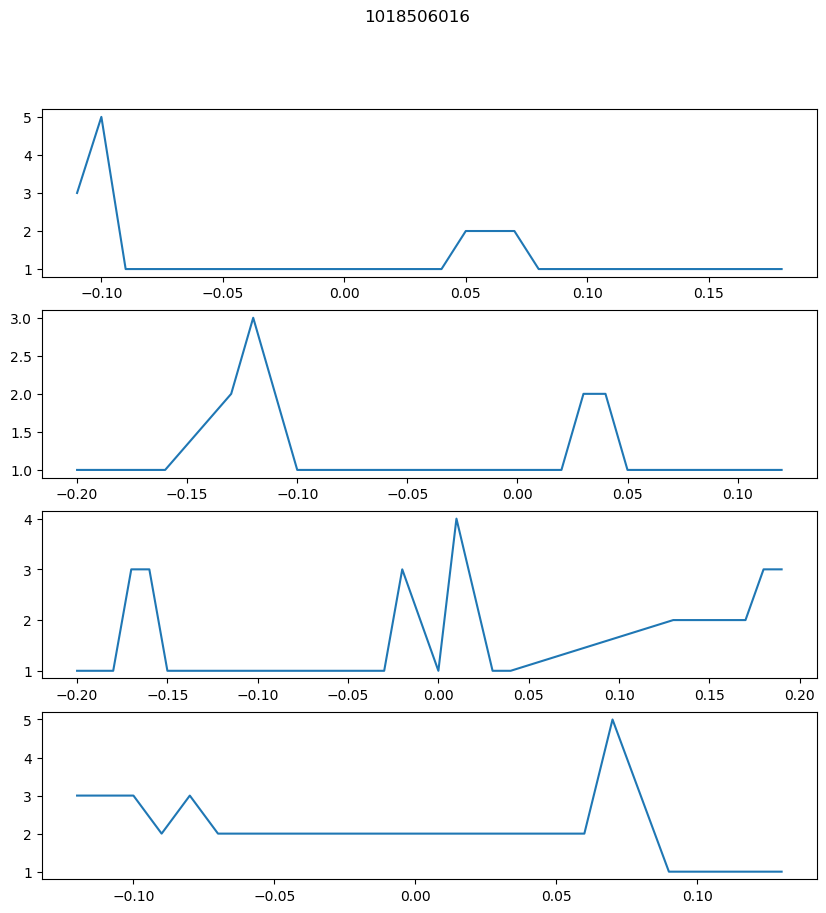

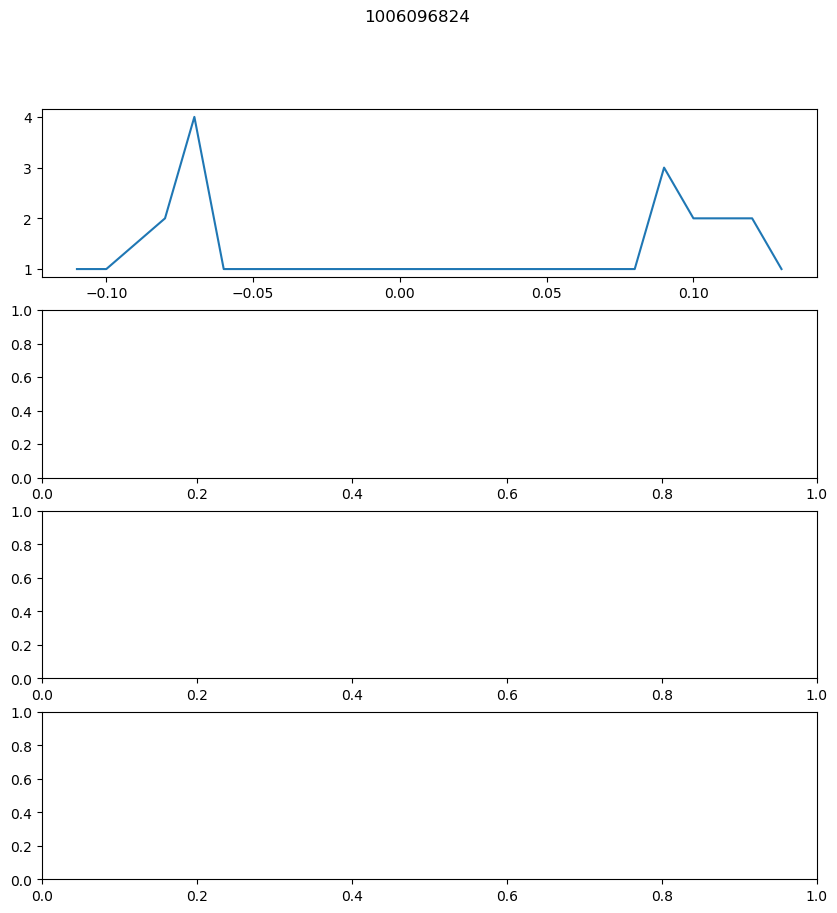

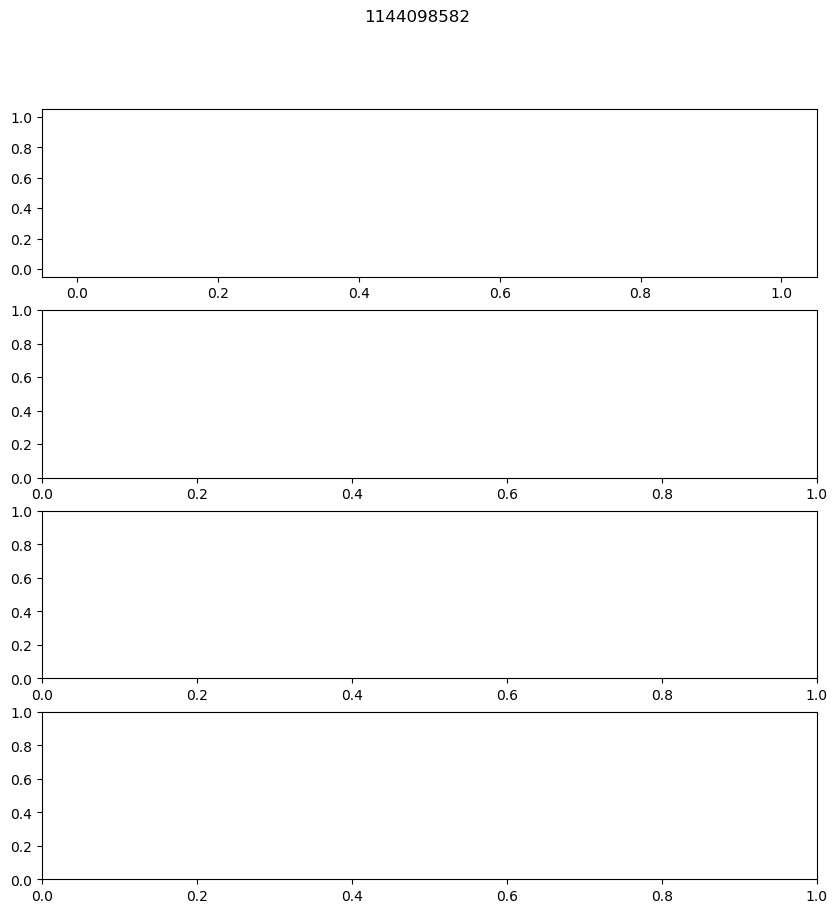

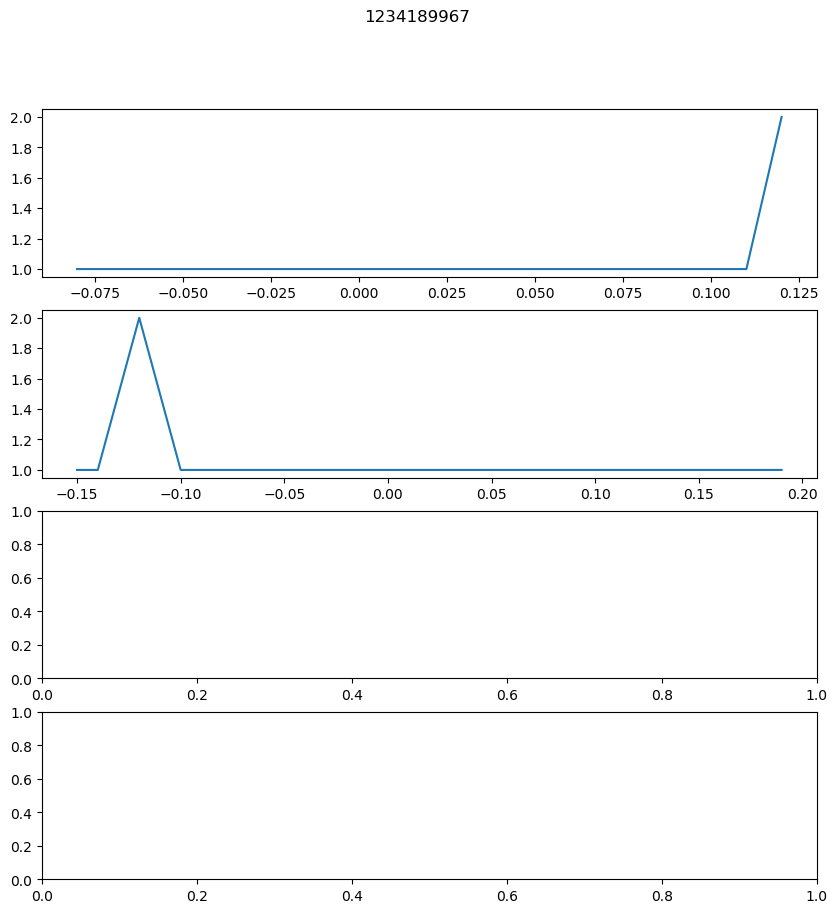

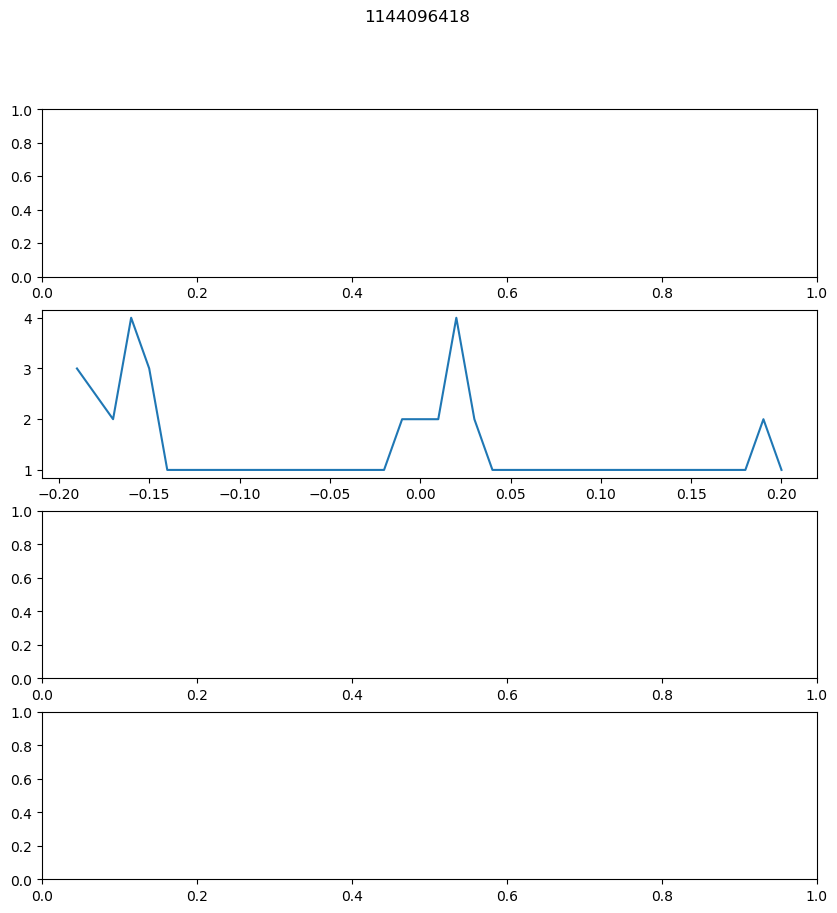

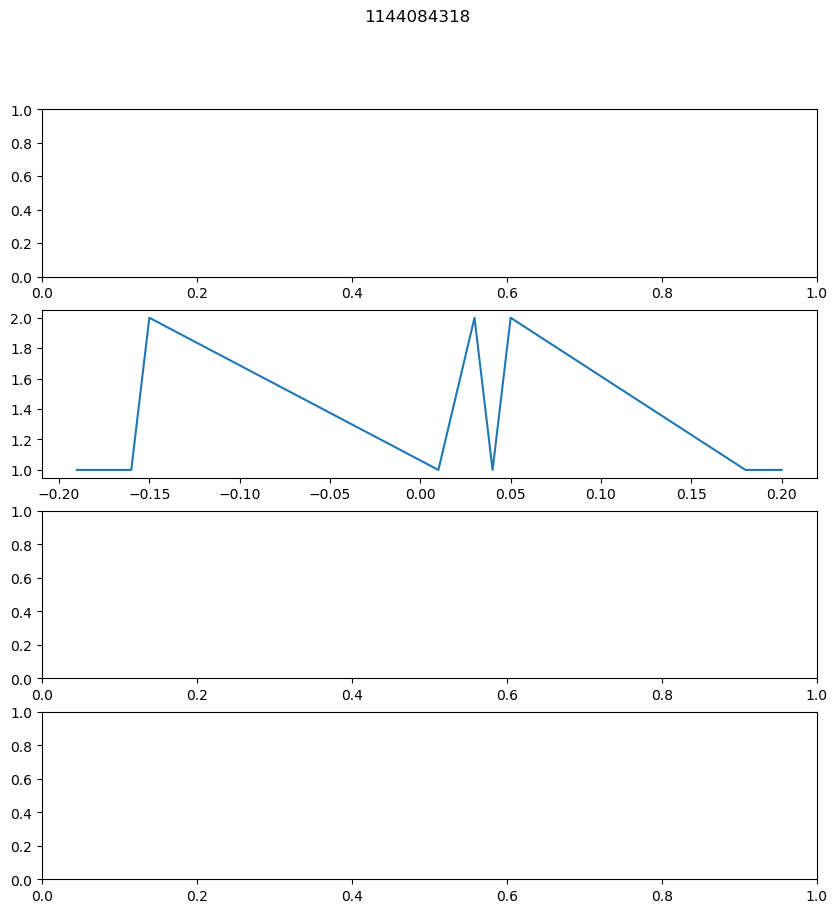

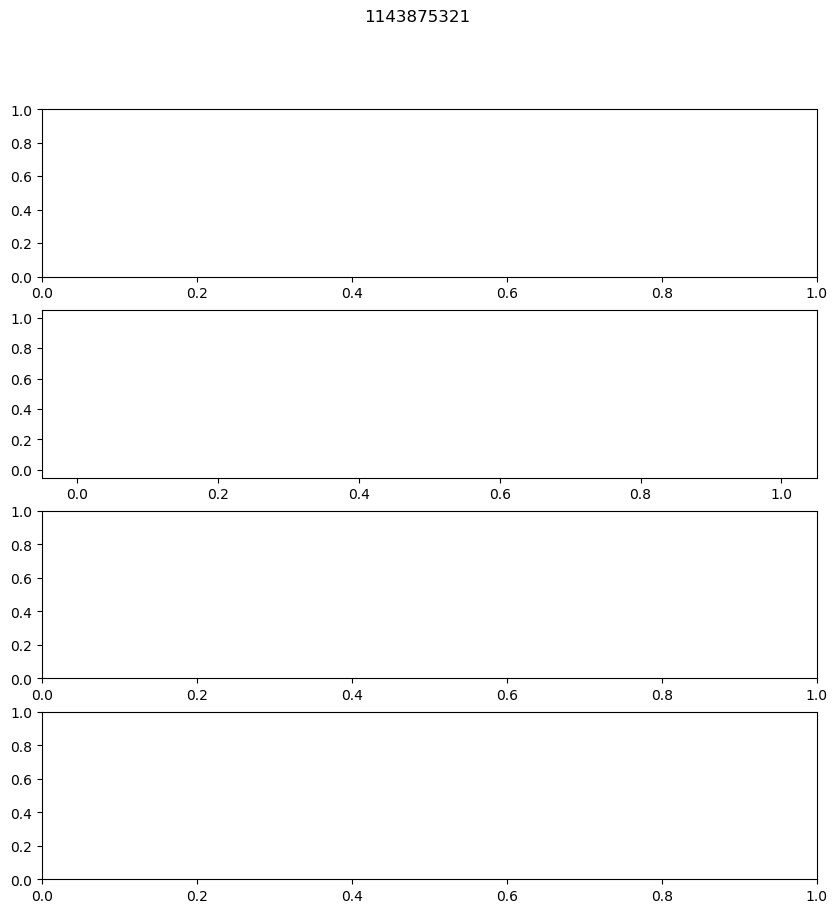

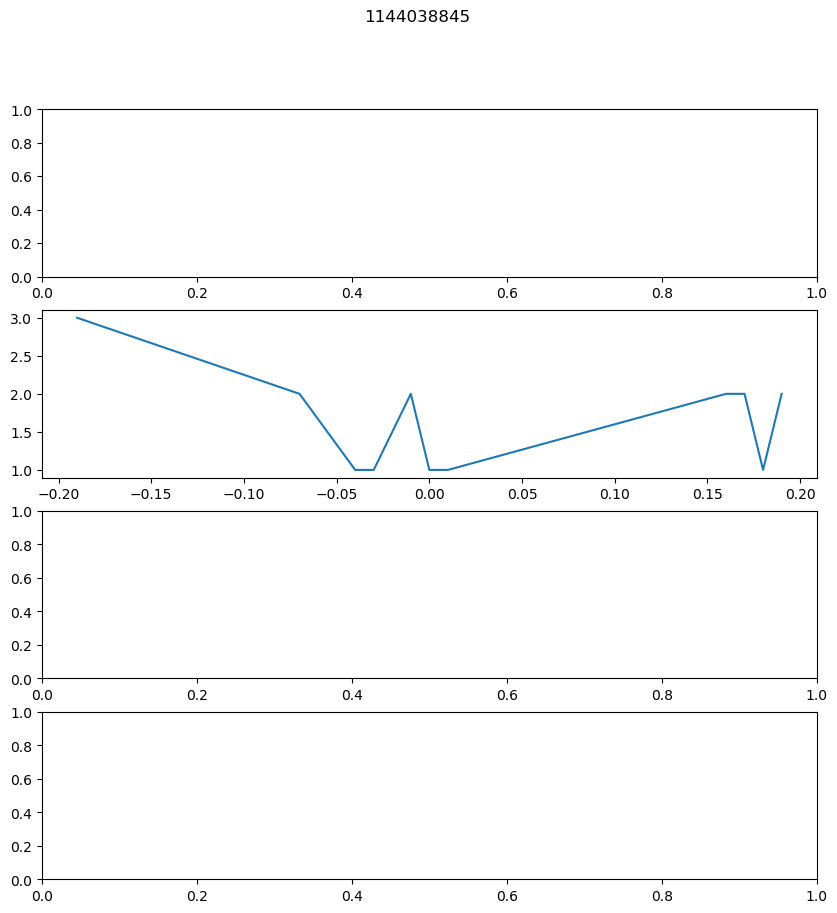

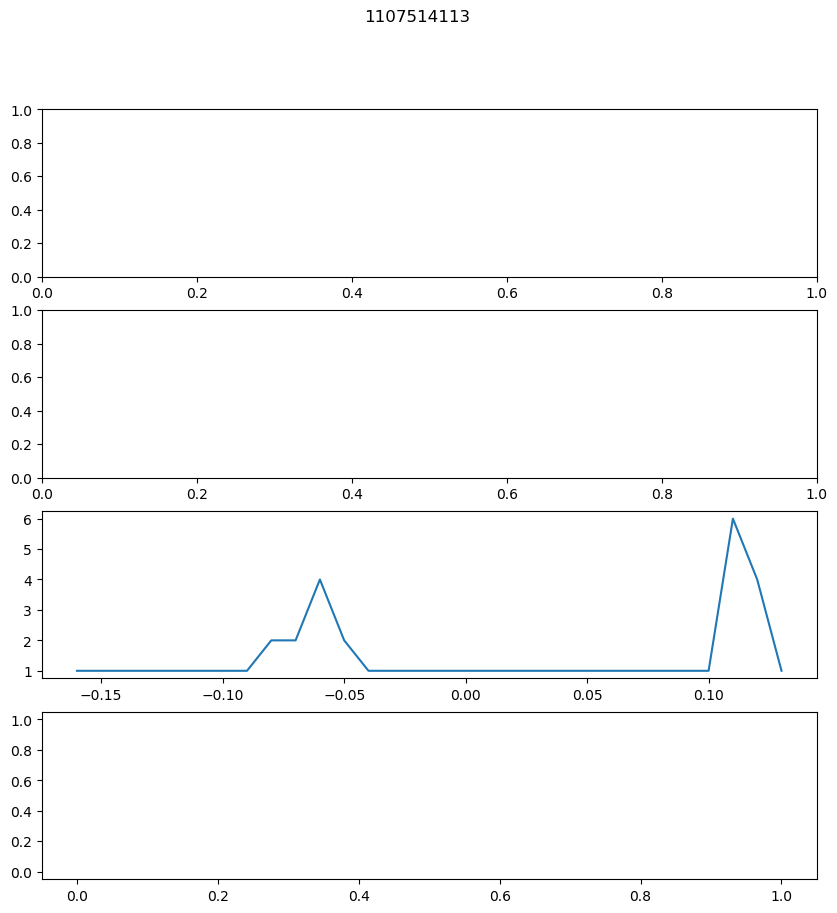

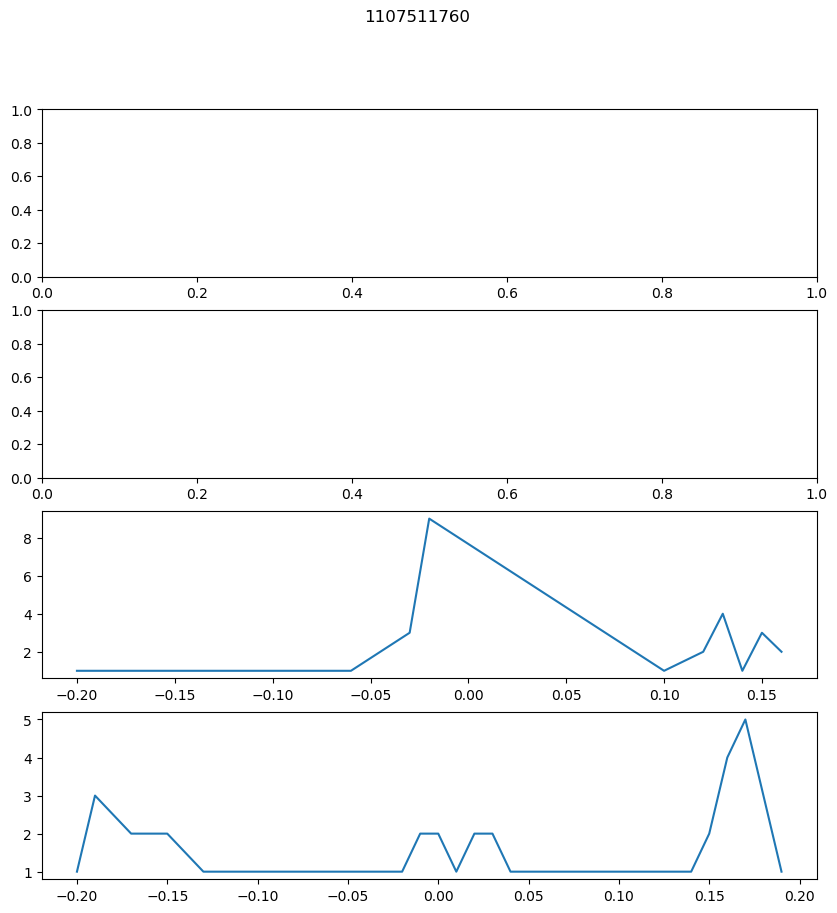

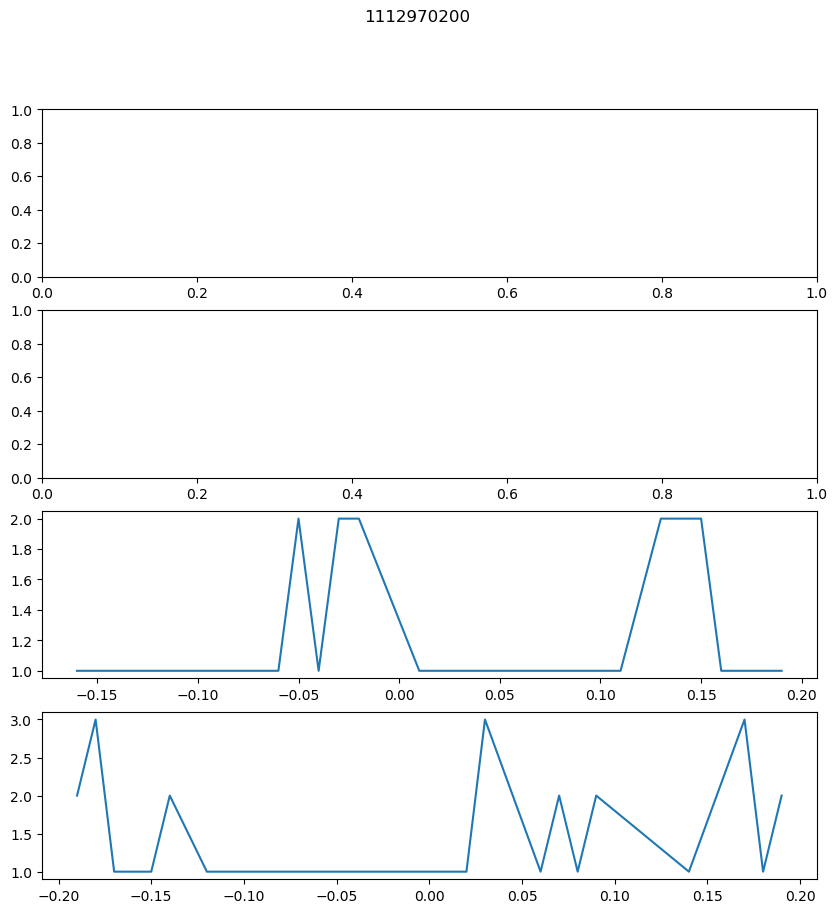

In [237]:
for user in delay.keys():
    fig, axs = plt.subplots(4,  figsize=(10,10))
    fig.suptitle(user)
    
    hist_data0 = None
    hist_data1 = None
    hist_data2 = None
    hist_data3 = None
    
    for date in delay[user].keys():
        
        print(user)
        print(date)
        if date == '2019/5/22':
            hist_data0 = calculate_repetitions_delay_day(delay[user][date].split(" "))
            hist_data0 = collections.OrderedDict(sorted(hist_data0.items()))
        if date == '2019/5/28':
            hist_data1 = calculate_repetitions_delay_day(delay[user][date].split(" "))
            hist_data1 = collections.OrderedDict(sorted(hist_data1.items()))
        if date == '2019/6/5':
            hist_data2 = calculate_repetitions_delay_day(delay[user][date].split(" "))
            hist_data2 = collections.OrderedDict(sorted(hist_data2.items()))
        if date == '2019/6/6':
            hist_data3 = calculate_repetitions_delay_day(delay[user][date].split(" "))
            hist_data3 = collections.OrderedDict(sorted(hist_data3.items()))

    if hist_data0 != None:
        axs[0].plot(list(hist_data0.keys()), list(hist_data0.values()))
    if hist_data1 != None:
        axs[1].plot(list(hist_data1.keys()), list(hist_data1.values()))
    if hist_data2 != None:
        axs[2].plot(list(hist_data2.keys()), list(hist_data2.values()))
    if hist_data3 != None:
        axs[3].plot(list(hist_data3.keys()), list(hist_data3.values()))


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


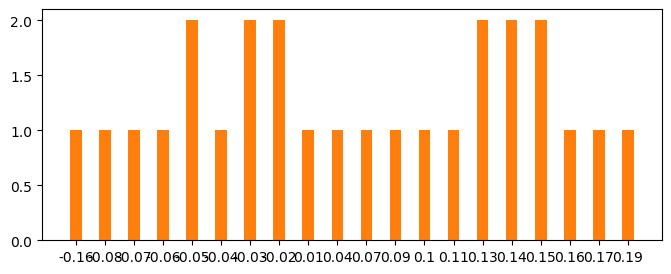

In [238]:
fig = plt.figure(2, figsize=(8,3)) # Figure


nombres = list(hist_data.keys())
datos = list(hist_data.values())
xx = range(len(datos))

ax1 = fig.add_subplot(111) # Axes
ax1.bar(xx, datos, width=0.4, align='center')
ax1.set_xticks(xx)
ax1.set_xticklabels(nombres)


ax2 = fig.add_subplot(111) # Axes
ax2.bar(xx, datos, width=0.4, align='center')
ax2.set_xticks(xx)
ax2.set_xticklabels(nombres)

plt.show()

## Data visualization 

### song between 0 and 30 seconds

In [9]:
#import librosa
#x, sr = librosa.load('audio/10-[0-30].mp3')

OSError: Could not load shared object file: llvmlite.dll

In [ ]:
print(x.shape)
print(sr)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

### Waveplot

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Spectrogram

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
import IPython.display as ipd
ipd.Audio('audio/10-[0-30].mp3') # load a local WAV fil'audio/1.mp3'e

In [ ]:
tempo, beat_times = librosa.beat.beat_track(x, sr=sr, start_bpm=113, units='time')

In [ ]:
plt.figure(figsize=(18, 5))
librosa.display.waveplot(x, alpha=0.6)
plt.vlines(dict_10, -1, 1, color='r')
plt.ylim(-1, 1)

plt.vlines(beat_times, -1, 1, color='y')
plt.ylim(-1, 1)

### song between 30 and 60 seconds

In [ ]:
x, sr = librosa.load('audio/10-[30-60].mp3')

### Waveplot

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Spectrogram

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
tempo, beat_times = librosa.beat.beat_track(x, sr=sr, start_bpm=113, units='time')

In [ ]:
plt.figure(figsize=(18, 5))
librosa.display.waveplot(x, alpha=0.6)
plt.vlines(dict_10, -1, 1, color='r')
plt.ylim(-1, 1)

plt.vlines(beat_times, -1, 1, color='y')
plt.ylim(-1, 1)

In [ ]:
import librosa